# Proyek Analisis Data: E-Commerce
- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kita dapat mengukur tingkat kepuasan pelanggan dalam bentuk persentase?
- Pertanyaan 2: Bagaimana distribusi status pesanan pelanggan, seperti pesanan yang sedang diproses, pesanan dalam pengiriman, pesanan yang telah selesai, hingga pesanan yang mengalami pembatalan?
- Pertanyaan 3: Produk apa saja yang memiliki penjualan terbanyak dan rating terbaik?
- Pertanyaan 4: Kota mana saja yang memiliki penjualan terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# melihat versi dari setiap library

session_info.show()

## Data Wrangling

### Gathering Data

In [3]:
data_customer = pd.read_csv(r'customers_dataset.csv')
data_geolocation = pd.read_csv(r'geolocation_dataset.csv')
data_order_items = pd.read_csv(r'order_items_dataset.csv')
data_order_payments = pd.read_csv(r'order_payments_dataset.csv')
data_order_reviews = pd.read_csv(r'order_reviews_dataset.csv')
data_orders = pd.read_csv(r'orders_dataset.csv')
data_product_category_name = pd.read_csv(r'product_category_name_translation.csv')
data_products = pd.read_csv(r'products_dataset.csv')
data_sellers = pd.read_csv(r'sellers_dataset.csv')

In [4]:
data_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
30441,503976dd917f8133babc4f0492a0e938,automotivo,60.0,202.0,3.0,200.0,16.0,15.0,15.0
11489,cfa9c98a148ace270ebd4a856316c227,telefonia,58.0,274.0,2.0,200.0,19.0,4.0,11.0
10363,a25e87065dc111adf2944d046ab3eda1,perfumaria,23.0,68.0,1.0,400.0,35.0,15.0,25.0
1990,0ca7afae61c042aedfd973110cd8970f,utilidades_domesticas,54.0,493.0,1.0,1733.0,23.0,23.0,21.0
23537,252641aa4855aef622089db60c4ad90a,cool_stuff,58.0,3217.0,2.0,100.0,16.0,16.0,16.0


In [5]:
data_product_category_name.sample(5)

,product_category_name,product_category_name_english
64,cds_dvds_musicais,cds_dvds_musicals
6,perfumaria,perfumery
19,consoles_games,consoles_games
22,cool_stuff,cool_stuff
5,esporte_lazer,sports_leisure


In [6]:
data_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
29828,43d3cc829a59f03af73f2a7fc9542ee6,1,0ec5f6f08cf32bc916d0ae089696a44a,218d46b86c1881d022bce9c68a7d4b15,2017-05-10 21:42:23,271.00,21.98
66757,988f13625d65d9a81777bb4d93d01e1b,1,55624051e913597daf59dee5c582b6b9,7142540dd4c91e2237acb7e911c4eba2,2017-12-11 10:14:45,84.90,13.61
84336,bfa7102f2f9eb8afc761f1eedb37c744,1,59707268b54920d0814697573f63c818,7c67e1448b00f6e969d365cea6b010ab,2017-03-29 11:15:22,176.99,53.79
12148,1b90587d2255b7eb1dcc4d2c7eba1c54,1,75c06ee06b201f9b6301d2b5e72993f8,3c7c4a49ec3c6550809089c6a2ca9370,2018-01-25 02:38:48,13.99,14.10
84927,c0fcc74d37e499bd4f73ddca4ffb9a64,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-05-22 14:16:30,79.00,14.64


In [7]:
data_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
79672,0e4463c6e144261bd3b088fac9fef441,e96b8d0cf6eb527f97d92d4d8ed31ba5,delivered,2017-12-24 17:47:55,2017-12-27 04:07:13,2017-12-29 17:22:42,2018-01-08 20:03:29,2018-01-19 00:00:00
25893,2cc606fca85523eee5d51c8d9defe0a5,09e3aaa17d44116c17b6627e5e9630d7,delivered,2018-07-15 07:08:12,2018-07-17 04:31:35,2018-07-23 11:31:00,2018-07-30 14:57:55,2018-08-13 00:00:00
44900,e7321975436d5f8b04e468048b861e31,1c587b7eaadf2a38dc35ae4b82db832a,delivered,2017-06-02 12:09:06,2017-06-06 13:10:25,2017-06-16 19:28:28,2017-06-23 11:12:08,2017-07-05 00:00:00
11009,c6ad7089d27e68a395de452a632cb54e,0a772b10ef12b6b87ccb345a44eab70e,delivered,2018-08-05 11:47:06,2018-08-06 15:25:14,2018-08-07 12:37:00,2018-08-13 12:38:42,2018-08-28 00:00:00
98005,b2bb04e94ed5f8785791697f33fce452,edfb309e51665130ff3fa49524cc8ae1,delivered,2018-06-08 16:37:54,2018-06-08 19:31:01,2018-06-11 09:42:00,2018-06-21 16:22:43,2018-07-13 00:00:00


In [8]:
data_order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
42186,9fa180b1191e6a054c50b9bd0567534d,599c3870e523bd6be85a650381029959,5,NaN,NaN,2018-08-03 00:00:00,2018-08-05 12:42:01
30387,33c2bc967745e7dfdf947f645ff7f3f8,e8e186c0ebe18282aada53c56e7da34f,2,NaN,"Produto de boa qualidade, porém, comprei para ...",2017-06-01 00:00:00,2017-06-01 20:34:09
36718,5ef15c2bebad84584a2094bfd00efafa,e80668d1356f3b4f4c77cbdb452adb7b,4,NaN,NaN,2017-11-02 00:00:00,2017-11-05 20:24:35
90990,b5aff7d3311a222f777036ce5ef5d4a0,0ab83b3fdbca202530950e8f1896412a,5,NaN,NaN,2017-05-24 00:00:00,2017-05-25 11:54:43
85289,8ccc39ab31a456a962d5fcca24c1b8db,f6936f90b47f4c2a88307ac09bcf36e6,5,NaN,NaN,2018-02-03 00:00:00,2018-02-04 12:17:44


In [9]:
data_sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1458,447d377bdb757058acb569025ee18a93,99500,carazinho,RS
1713,c6381d2d013342748761e906d45aff76,93180,portao,RS
3086,725af026f869236a8dd0ceb98564d156,35530,claudio,MG
960,082e0bf4cb865a6533b1e8e498cc0255,18608,botucatu,SP
3019,eb3071b9f0b0ddaa2df5ea130f09f26b,4281,sao paulo,SP


In [10]:
data_merge = pd.merge(
    left=data_products,
    right=data_product_category_name,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [11]:
data_merge = pd.merge(
    left=data_merge,
    right=data_order_items,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

In [12]:
data_merge = pd.merge(
    left=data_merge,
    right=data_orders,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [13]:
data_merge = pd.merge(
    left=data_merge,
    right=data_order_reviews,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [14]:
data_merge = pd.merge(
    left=data_merge,
    right=data_sellers,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

In [15]:
data_merge.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
39324,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,garden_tools,...,2018-06-14 00:00:00,ab0305b0a23b66f211c7892f3c29f7a0,5,NaN,NaN,2018-05-17 00:00:00,2018-05-21 14:10:25,15025,sao jose do rio preto,SP
29594,59391e840980a4bb6df5f44d3d734df7,esporte_lazer,59.0,1025.0,4.0,600.0,16.0,4.0,13.0,sports_leisure,...,2018-03-05 00:00:00,ee9949691b193ae868d7c017f4180f64,4,NaN,NaN,2018-02-20 00:00:00,2018-02-20 22:21:04,32604,betim,MG
39024,b0961721fd839e9982420e807758a2a6,ferramentas_jardim,59.0,341.0,2.0,1850.0,37.0,22.0,40.0,garden_tools,...,2017-08-31 00:00:00,d81b61df8236876db86a271fb8f6a24f,4,NaN,Bom produto. Atende as expectativas. Igual ao ...,2017-08-09 00:00:00,2017-08-10 03:51:17,15025,sao jose do rio preto,SP
17367,4678fb24818cab9ec956d9b610435d9f,perfumaria,60.0,225.0,2.0,100.0,18.0,4.0,11.0,perfumery,...,2018-06-18 00:00:00,eda25a6ff9d6be0d7a1af790acc458ff,2,NaN,NaN,2018-06-13 00:00:00,2018-06-15 09:30:12,2215,sao paulo,SP
21205,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor,...,2018-04-06 00:00:00,637bacea784530377fec8b50b62a0a86,5,NaN,NaN,2018-03-28 00:00:00,2018-03-28 22:02:12,4782,sao paulo,SP


**Observasi:**  
Saya menggabungkan 6 dataset untuk dapat dianalisa lebih lanjut. 

dataset yang saya gunakan sebagai berikut:
- data_products
- data_product_category_name
- data_order_items
- data_orders
- data_order_reviews
- data_sellers

### Assessing Data

In [16]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     110750 non-null  object 
 1   product_category_name          110750 non-null  object 
 2   product_name_lenght            110750 non-null  float64
 3   product_description_lenght     110750 non-null  float64
 4   product_photos_qty             110750 non-null  float64
 5   product_weight_g               110749 non-null  float64
 6   product_length_cm              110749 non-null  float64
 7   product_height_cm              110749 non-null  float64
 8   product_width_cm               110749 non-null  float64
 9   product_category_name_english  110750 non-null  object 
 10  order_id                       110750 non-null  object 
 11  order_item_id                  110750 non-null  int64  
 12  seller_id                     

##### Missing Value

In [17]:
data_merge.isna().sum()

product_id                           0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
product_category_name_english        0
order_id                             0
order_item_id                        0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1145
order_delivered_customer_date     2293
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title     

**Observasi:**  
Terdapat missing value pada dataset, sehingga perlu dilakukan cleanning data

##### Duplicated

In [18]:
data_merge.duplicated().sum()

0

**Observasi:**  
Tidak terdapat Duplicated pada dataset, sehingga tidak perlu dilakukan cleaning data

##### Outlier

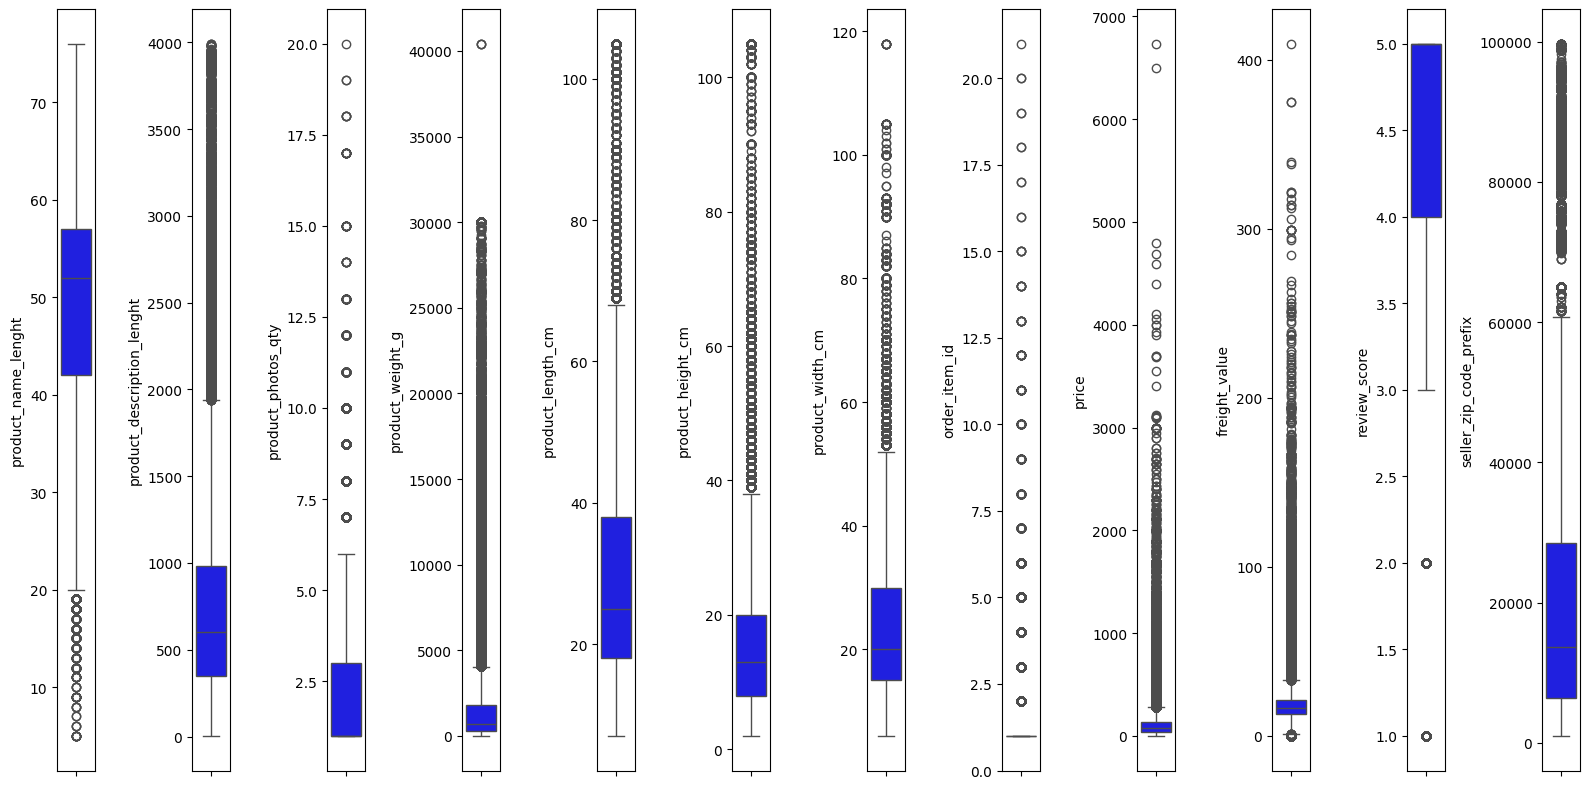

In [19]:
num_outlier = data_merge.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(16, 8))
for i in range(0,len(num_outlier)):
    plt.subplot(1, len(num_outlier), i+1)
    sns.boxplot(y=data_merge[num_outlier[i]], color='blue')
    plt.tight_layout()

**Observasi:**  
Terdapat banyak data yang mengalami outliers, sehingga perlu dilakukan cleaning data

### Cleaning Data

##### Missing Value

In [20]:
data_merge.isna().sum()

product_id                           0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
product_category_name_english        0
order_id                             0
order_item_id                        0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1145
order_delivered_customer_date     2293
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title     

In [21]:
# Handle Missing Value untuk Tipe data object

cat_missing_value = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_comment_title', 'review_comment_message']

for col in cat_missing_value:
    data_merge[col].fillna(data_merge[col].mode()[0], inplace=True)

In [22]:
# Handle Missing Value untuk Tipe data numeric

num_missing_value = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in num_missing_value:
    data_merge[col].fillna(data_merge[col].mean(), inplace=True)

In [23]:
data_merge.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timest

**Observasi:**  
- Menggunakan fillna() untuk mengganti nilai yang missing value dengan nilai tertentu. 
- Menggunakan mode() untuk nilai yang bertipe data kategorik
- Menggunakan mean() untuk nilai yang bertipe data numerik

##### Outlier

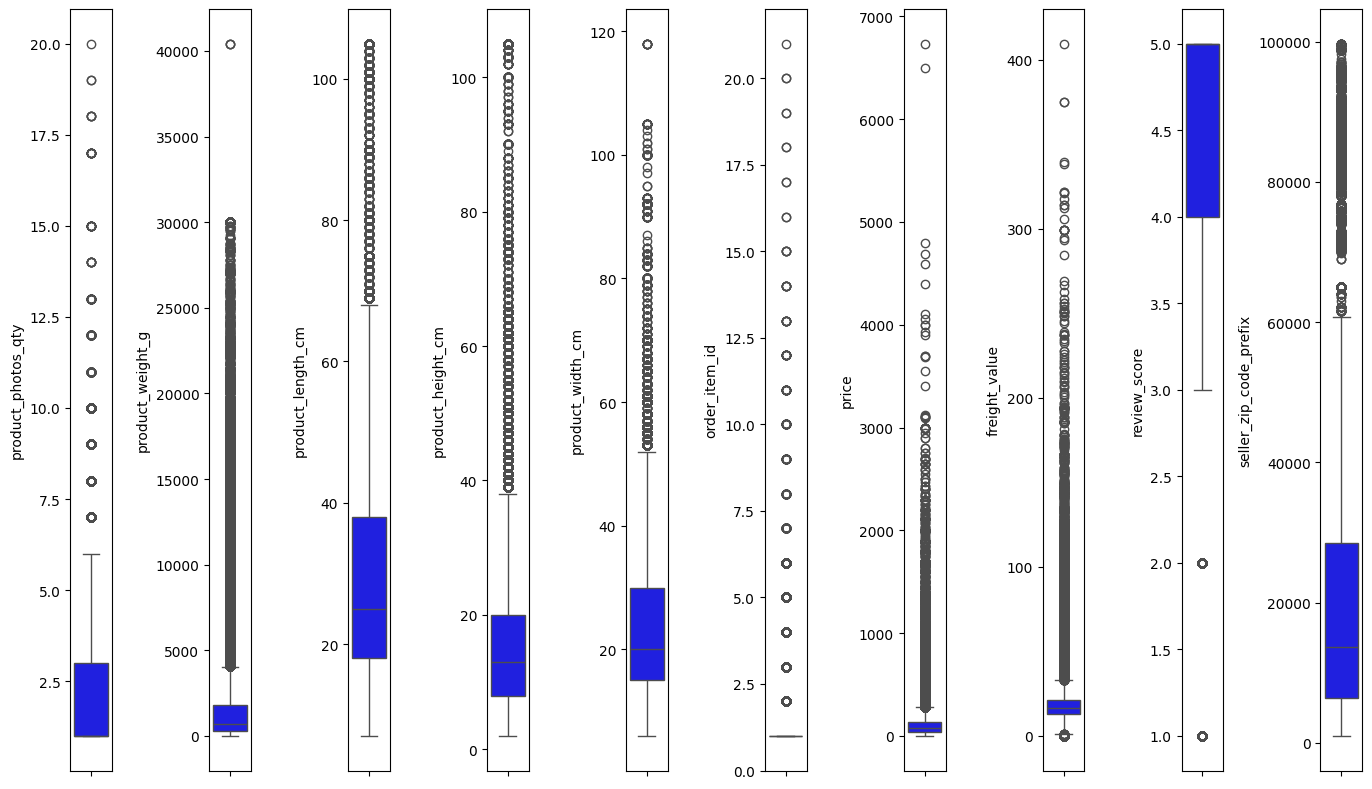

In [24]:
num_outlier = data_merge.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(16, 8))
for i in range(2,len(num_outlier)):
    plt.subplot(1, len(num_outlier), i+1)
    sns.boxplot(y=data_merge[num_outlier[i]], color='blue')
    plt.tight_layout()

In [25]:
# Handling outliers dengan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(data_merge[num_outlier])}')

for col in data_merge[num_outlier]:
    Q1 = data_merge[col].quantile(0.25)
    Q3 = data_merge[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    filtered_ouliers = ((data_merge[col] >= lower_limit) & (data_merge[col] <= upper_limit))

data_clean = data_merge[filtered_ouliers]

print('Jumlah baris setelah memfilter outlier', len(data_clean))

Jumlah baris sebelum memfilter outlier: 110750


Jumlah baris setelah memfilter outlier 93580


**Observasi:**  
- Menggunakan metode IQR untuk melakukan handle outlier
- Jumlah baris sebelum memfilter outlier terdapat 110750, kemudian jumlah baris berkurang menjadi 93580. karena metode IQR menghapus seluruh baris yang mengalamin outlier.

## Exploratory Data Analysis (EDA)

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 0 to 110746
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     93580 non-null  object 
 1   product_category_name          93580 non-null  object 
 2   product_name_lenght            93580 non-null  float64
 3   product_description_lenght     93580 non-null  float64
 4   product_photos_qty             93580 non-null  float64
 5   product_weight_g               93580 non-null  float64
 6   product_length_cm              93580 non-null  float64
 7   product_height_cm              93580 non-null  float64
 8   product_width_cm               93580 non-null  float64
 9   product_category_name_english  93580 non-null  object 
 10  order_id                       93580 non-null  object 
 11  order_item_id                  93580 non-null  int64  
 12  seller_id                      93580 non-null  obj

In [27]:
cat = data_clean.select_dtypes(include=['object']).columns.tolist()
num = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

**Observasi:**  
Membuat pengelompokan berdasarkan tipe data numerik dan kategorik agar dapat mempermudah melakukan analisis data

##### Mengeksplorasi Parameter Statistik

In [28]:
# Metode describe() untuk data yang bertipe kategorik

data_clean[cat].describe()

,product_id,product_category_name,product_category_name_english,order_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_city,seller_state
count,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580
unique,26570,71,71,81503,2262,77739,81503,7,81090,75484,67300,79183,443,81404,3915,30173,624,81278,389,10
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,bed_bath_table,5a3b1c29a49756e75f1ef513383c0c12,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,e8236fe7b6e1bdd513a500de361e2b87,Recomendo,Muito bom,2017-12-19 00:00:00,2017-07-30 14:19:07,sao paulo,SP
freq,524,10286,10286,22,2020,22,22,91598,22,35,1018,2005,524,21,82602,53775,432,21,27646,78687


In [29]:
# Menggunakan metode describe() untuk data yang bertipe numerik

data_clean[num].describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,review_score,seller_zip_code_prefix
count,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000
mean,48.895309,774.217557,2.227944,2113.875155,30.028190,16.552928,23.279515,1.200524,115.860476,19.257272,4.023146,13402.199904
std,9.946923,647.542429,1.730013,3769.221970,15.673965,13.638723,11.777088,0.705129,178.711452,15.104995,1.391744,10058.736641
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1.000000,1001.000000
25%,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.000000,12.690000,4.000000,5141.000000
50%,52.000000,591.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,69.900000,15.880000,5.000000,13170.000000
75%,57.000000,956.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,129.900000,20.190000,5.000000,14940.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,375.280000,5.000000,60741.000000


In [30]:
# Menggunakan metode corr() untuk memeriksa korelasi antar data numerik

data_clean[num].corr()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,review_score,seller_zip_code_prefix
product_name_lenght,1.000000,0.077151,0.157738,0.009604,0.062056,-0.036213,0.058908,-0.021284,0.012958,0.018647,-0.006972,-0.017243
product_description_lenght,0.077151,1.000000,0.108513,0.055872,-0.015678,0.075912,-0.081569,-0.009354,0.192724,0.089480,0.009803,0.062148
product_photos_qty,0.157738,0.108513,1.000000,0.000274,0.019331,-0.047546,-0.021649,-0.055200,0.046581,0.007356,0.019299,-0.069707
product_weight_g,0.009604,0.055872,0.000274,1.000000,0.457546,0.589986,0.498532,0.005050,0.327389,0.619752,-0.035415,0.052578
product_length_cm,0.062056,-0.015678,0.019331,0.457546,1.000000,0.202565,0.556731,0.015827,0.133344,0.303955,-0.029388,0.008833
product_height_cm,-0.036213,0.075912,-0.047546,0.589986,0.202565,1.000000,0.273884,0.039466,0.218138,0.392983,-0.033376,-0.002437
product_width_cm,0.058908,-0.081569,-0.021649,0.498532,0.556731,0.273884,1.000000,-0.004436,0.168108,0.330388,-0.015394,0.068813
order_item_id,-0.021284,-0.009354,-0.055200,0.005050,0.015827,0.039466,-0.004436,1.000000,-0.059440,-0.017888,-0.133298,-0.021138
price,0.012958,0.192724,0.046581,0.327389,0.133344,0.218138,0.168108,-0.059440,1.000000,0.395060,-0.004074,0.096161
freight_value,0.018647,0.089480,0.007356,0.619752,0.303955,0.392983,0.330388,-0.017888,0.395060,1.000000,-0.045826,0.149131


**Observasi:**  
- Menggunakan describe() dan corr() untuk melihat korelasi dan distribusi data numerik

##### Mengelompokan Data

In [31]:
# product dengan penjualan terbanyak dan memiliki rating terbaik

best_product = data_clean.groupby(by='product_category_name_english').agg({'order_id': 'count',
                                                                          'review_score': 'mean'}).reset_index()

best_product = best_product.sort_values(by=['order_id', 'review_score'], ascending=[False, False]).head(10).reset_index()

In [32]:
best_product

,index,product_category_name_english,order_id,review_score
0,7,bed_bath_table,10286,3.903072
1,43,health_beauty,7914,4.136341
2,39,furniture_decor,6976,3.873280
3,65,sports_leisure,6397,4.070345
4,49,housewares,5866,4.015172
5,70,watches_gifts,5490,4.006557
6,15,computers_accessories,5452,3.951394
7,68,telephony,4311,3.943401
8,42,garden_tools,3896,4.036961
9,5,auto,3704,4.071814


In [33]:
# Kota dengan penjualan terbanyak

best_seller = data_clean.groupby(by='seller_city').agg({'order_id': 'count'}).reset_index()
best_seller = best_seller.sort_values(by='order_id', ascending=False).head(10).reset_index()

In [34]:
best_seller

,index,seller_city,order_id
0,325,sao paulo,27646
1,142,ibitinga,7764
2,304,santo andre,3000
3,322,sao jose do rio preto,2564
4,45,belo horizonte,2500
5,287,rio de janeiro,2364
6,280,ribeirao preto,2239
7,137,guarulhos,1980
8,256,piracicaba,1908
9,161,itaquaquecetuba,1652


**Observasi:**  
Membuat pengelompokan data sebagai berikut:
- Produk dengan penjualan terbanyak dan rating tertinggi menggunakan kolom 'product_category_name_english', order_id, dan 'review_score'
- Kota dengan penjualan terbanyak menggunakan kolom 'seller_city', dan 'order_id'

## Visualization & Explanatory Analysis

In [35]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 0 to 110746
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     93580 non-null  object 
 1   product_category_name          93580 non-null  object 
 2   product_name_lenght            93580 non-null  float64
 3   product_description_lenght     93580 non-null  float64
 4   product_photos_qty             93580 non-null  float64
 5   product_weight_g               93580 non-null  float64
 6   product_length_cm              93580 non-null  float64
 7   product_height_cm              93580 non-null  float64
 8   product_width_cm               93580 non-null  float64
 9   product_category_name_english  93580 non-null  object 
 10  order_id                       93580 non-null  object 
 11  order_item_id                  93580 non-null  int64  
 12  seller_id                      93580 non-null  obj

### Univariate Analysis

##### Pertanyaan 1:

Bagaimana kita dapat mengukur tingkat kepuasan pelanggan dalam bentuk persentase?

In [36]:
review_score = data_clean['review_score'].value_counts()

In [37]:
review_score

review_score
5    52587
4    17771
1    11951
3     7974
2     3297
Name: count, dtype: int64

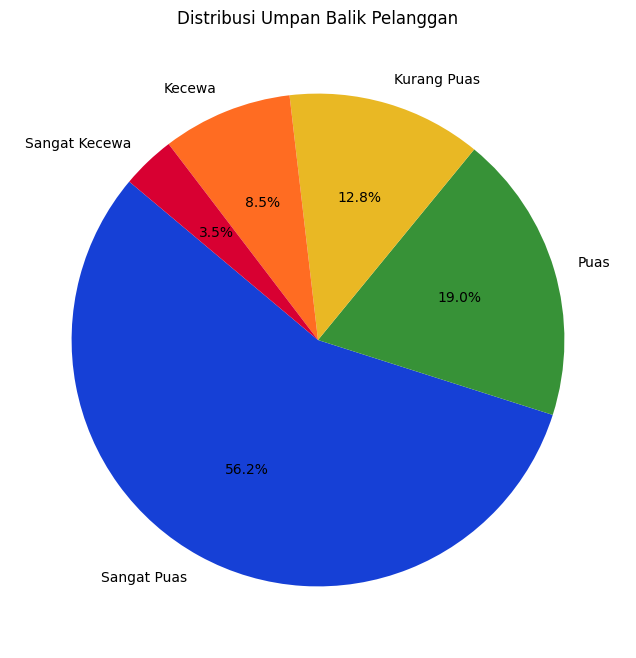

In [38]:
review_score = data_clean['review_score'].value_counts()

labels = ['Sangat Puas', 'Puas', 'Kurang Puas', 'Kecewa', 'Sangat Kecewa']
colors = ['#1640D6', '#379237', '#E9B824', '#FF6C22', '#D80032']
sizes = review_score.values

plt.figure(figsize=(8, 8))
plt.pie(x=sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Umpan Balik Pelanggan')

plt.show()

**Observasi:**  
Visualisasi ini memberikan gambaran yang jelas tentang tingkat kepuasan pelanggan. Mayoritas pelanggan menyatakan **Sangat Puas** dengan persentase sebanyak 56.2%. kemudian dilanjut dengan pelanggan yang menyatakan **Puas** dengan persentase sebanyak 19%. Meskipun ada sebagian besar respon positif, kita juga melihat bahwa sekitar 12.8% pelanggan merasa **Kurang Puas**, sementara pelanggan yang merasa **Kecewa** dan **Sangat Kecewa** jika dijumlahkan sebanyak 11%, walaupun mayoritas pelanggan merasa puas, masih perlu perhatian terhadap aspek-aspek yang membuat sebagian pelanggan merasa kurang puas atau kecewa.

##### Pertanyaan 2:

Bagaimana distribusi status pesanan pelanggan, seperti pesanan yang sedang diproses, pesanan dalam pengiriman, pesanan yang telah selesai, hingga pesanan yang mengalami pembatalan?

In [39]:
data_clean['order_status'].value_counts()

order_status
delivered      91598
shipped          953
canceled         448
invoiced         293
processing       280
unavailable        5
approved           3
Name: count, dtype: int64

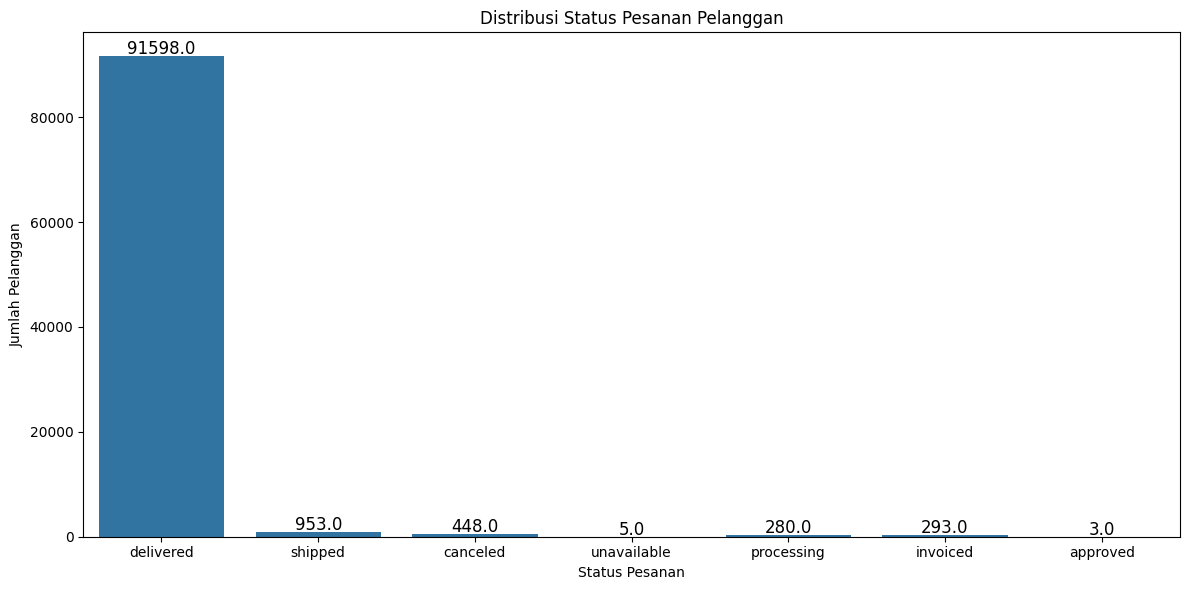

In [40]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data_clean, x='order_status', orient='h')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Status Pesanan Pelanggan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()

plt.show()

**Observasi:**  
Terdapat status proses pesanan sebagai berikut:
- Jumlah pesanan yang **delivered** sebanyak 91598
- Jumlah pesanan yang **shipped** sebanyak 953
- Jumlah pesanan yang **canceled** sebanyak 448
- Jumlah pesanan yang **unavailable** sebanyak 5
- Jumlah pesanan yang **processing** sebanyak 280
- Jumlah pesanan yang **invoiced** sebanyak 293
- Jumlah pesanan yang **approved** sebanyak 3

Namun, fokus perlu kita perhatikan kepada pelanggan yang melakukan **canceled** dengan jumlah sebanyak 448 pesanan dibatalkan. sehingga perlu strategi khusus untuk menurunkan pembatalan pesanan tersebut.

### Multivariate Analysis

##### Pertanyaan 3:

Produk apa saja yang memiliki penjualan terbanyak dan rating terbaik?

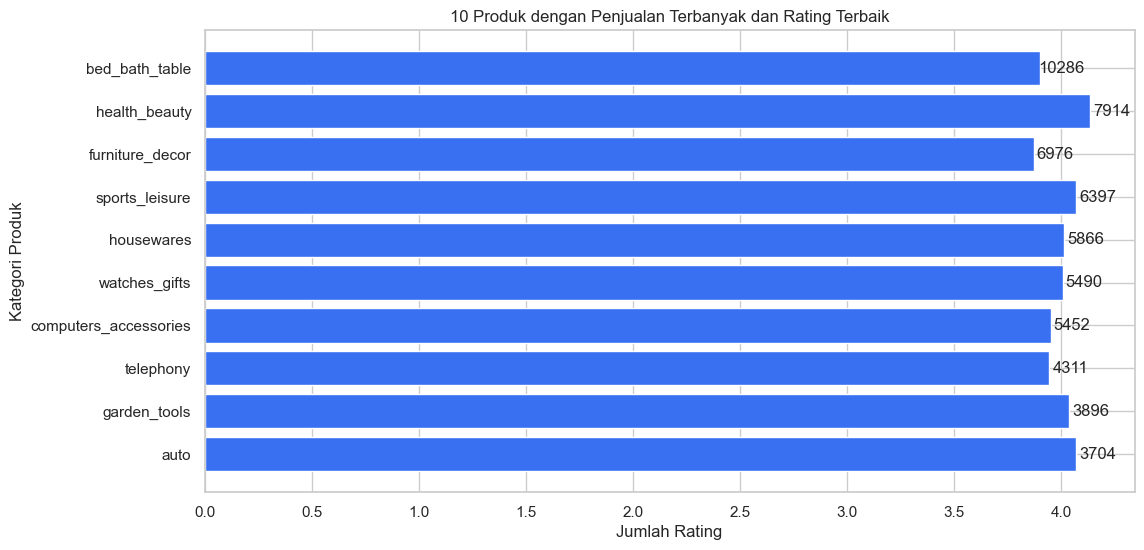

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

bars = plt.barh(best_product['product_category_name_english'],
                best_product['review_score'],
                color='#3970F1'
               )

for bar, order_count in zip(bars, best_product['order_id']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(order_count), ha='center', va='center')

plt.xlabel('Jumlah Rating')
plt.ylabel('Kategori Produk')
plt.title('10 Produk dengan Penjualan Terbanyak dan Rating Terbaik')

plt.gca().invert_yaxis()
plt.show()

**Observasi:**  
Terdapat Sumbu Y yang menunjukkan kolom 'product_category_name_english' dan sumbu X yang menunjukkan kolom 'review_score' yang menggambarkan Rating/Umpan Balik dari pelanggan.

Berdasarkan data visualisasi terlihat bahwa produk dengan rating tertinggi terdapat pada produk **healty_beuty** dan **auto** dengan rating 4 sekian. tetapi untuk produk yang memiliki penjualan terbanyak ialah produk **bed_bath_table** dengan penjualan sebanyak 10286 dan memiliki rating 3.9.

##### Pertanyaan 4: 

Kota mana saja yang memiliki penjualan terbanyak?

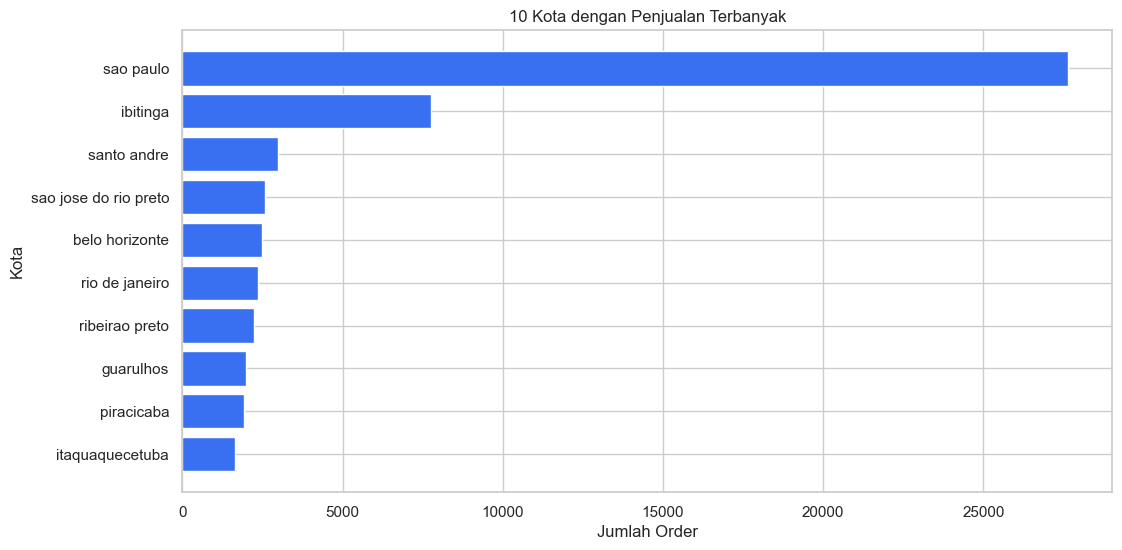

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(best_seller['seller_city'],
         best_seller['order_id'],
         color='#3970F1'
         )

plt.xlabel('Jumlah Order')
plt.ylabel('Kota')
plt.title('10 Kota dengan Penjualan Terbanyak')

plt.gca().invert_yaxis()
plt.show()

**Observasi:**  
Terdapat Sumbu Y yang menunjukkan kolom 'seller_city' dan sumbu X yang menunjukkan kolom 'order_id' yang menggambarkan jumlah penjualan.

Berdasarkan data visualisasi terlihat bahwa kota dengan penjualan terbanyak terdapat pada kota **sao paulo** dengan penjualan sebanyak 25000 sekian. Jika kita lihat bahwa distribusi penjualan mengalami perbedaan yang signifikan sehingga perlu strategi khusus untuk meningkatkan penjualan untuk kota-kota yang lain.

## Conclusion

Saya akan memberikan beberapa rekomendasi atau solusi yang dapat digunakan oleh stakeholder 

Solusi Pertanyaan 1: 
- Stakeholder dapat meningkatkan kualitas produk atau layanan. seperti Melakukan riset pasar untuk mengetahui kebutuhan dan keinginan pelanggan, serta melakukan inovasi produk atau layanan secara berkala.
- stakeholder dapat meningkatkan komunikasi dengan pelanggan. seperti Meningkatkan kemudahan dalam menyampaikan keluhan kepada pelanggan, atau meningkatkan responsivitas terhadap keluhan pelanggan.

Solusi Pertanyaan 2:
- Mengumpulkan umpan balik dari pelanggan yang membatalkan pesanan. Mungkin dengan menyelenggarakan survei singkat atau menghubungi mereka langsung. Ini dapat memberikan insight langsung dan membantu meningkatkan proses pelayanan.
- Pastikan proses pengiriman berjalan lancar dan sesuai dengan harapan pelanggan. Informasi pelacakan yang akurat dan pengiriman tepat waktu dapat mengurangi kemungkinan pembatalan.

Solusi Pertanyaan 3:
- Meskipun produk kategori "health_beauty" dan "auto" memiliki rating tertinggi, perhatikan untuk tetap mempertahankan dan meningkatkan kualitas produk dalam kategori tersebut. Ini dapat menciptakan kepuasan pelanggan yang lebih besar dan membangun reputasi positif.
- Mengidentifikasi faktor-faktor yang menyebabkan rating menurun dan perbaiki masalah tersebut. Hal ini dapat membantu meningkatkan kepuasan pelanggan dan meningkatkan rating produk.
- Tinjau kembali strategi persediaan dan permintaan untuk memastikan bahwa produk dengan rating tinggi memiliki ketersediaan yang memadai. Jika ada kekurangan stok, ini dapat menyebabkan penurunan kepuasan pelanggan.

Solusi Pertanyaan 4:
- Lakukan analisis pasar untuk masing-masing kota dengan penjualan rendah. Pahami karakteristik demografis, preferensi pelanggan, dan tren pasar di setiap kota untuk merancang strategi yang sesuai.
- Sesuaikan penawaran produk dengan kebutuhan pelanggan. Produk atau layanan yang populer di Sao Paulo mungkin tidak sepopuler di kota lain, jadi perlu adaptasi.

## Teknik Analisis Lanjutan

##### Unsupervised = Metode Clustering

In [43]:
feature = ['price', 'review_score']
X = data_clean[feature].values

In [44]:
data_clean[feature].describe()

,price,review_score
count,93580.000000,93580.000000
mean,115.860476,4.023146
std,178.711452,1.391744
min,0.850000,1.000000
25%,39.000000,4.000000
50%,69.900000,5.000000
75%,129.900000,5.000000
max,6735.000000,5.000000


In [45]:
X_std = StandardScaler().fit_transform(X)
data_model = pd.DataFrame(data = X_std, columns = feature)

data_model.head()

,price,review_score
0,-0.587265,0.701896
1,0.853445,-0.016631
2,-0.605507,0.701896
3,0.853445,-0.735158
4,-0.553859,-0.016631


In [46]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_model.values)
    inertia.append(kmeans.inertia_)

kmeans

c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of n_init will change from 10 to 'auto' in 1.4. Set the value of n_init explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of n_init will change from 10 to 'auto' in 1.4. Set the value of n_init explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Li

KMeans(n_clusters=10, random_state=0)

<Axes: >

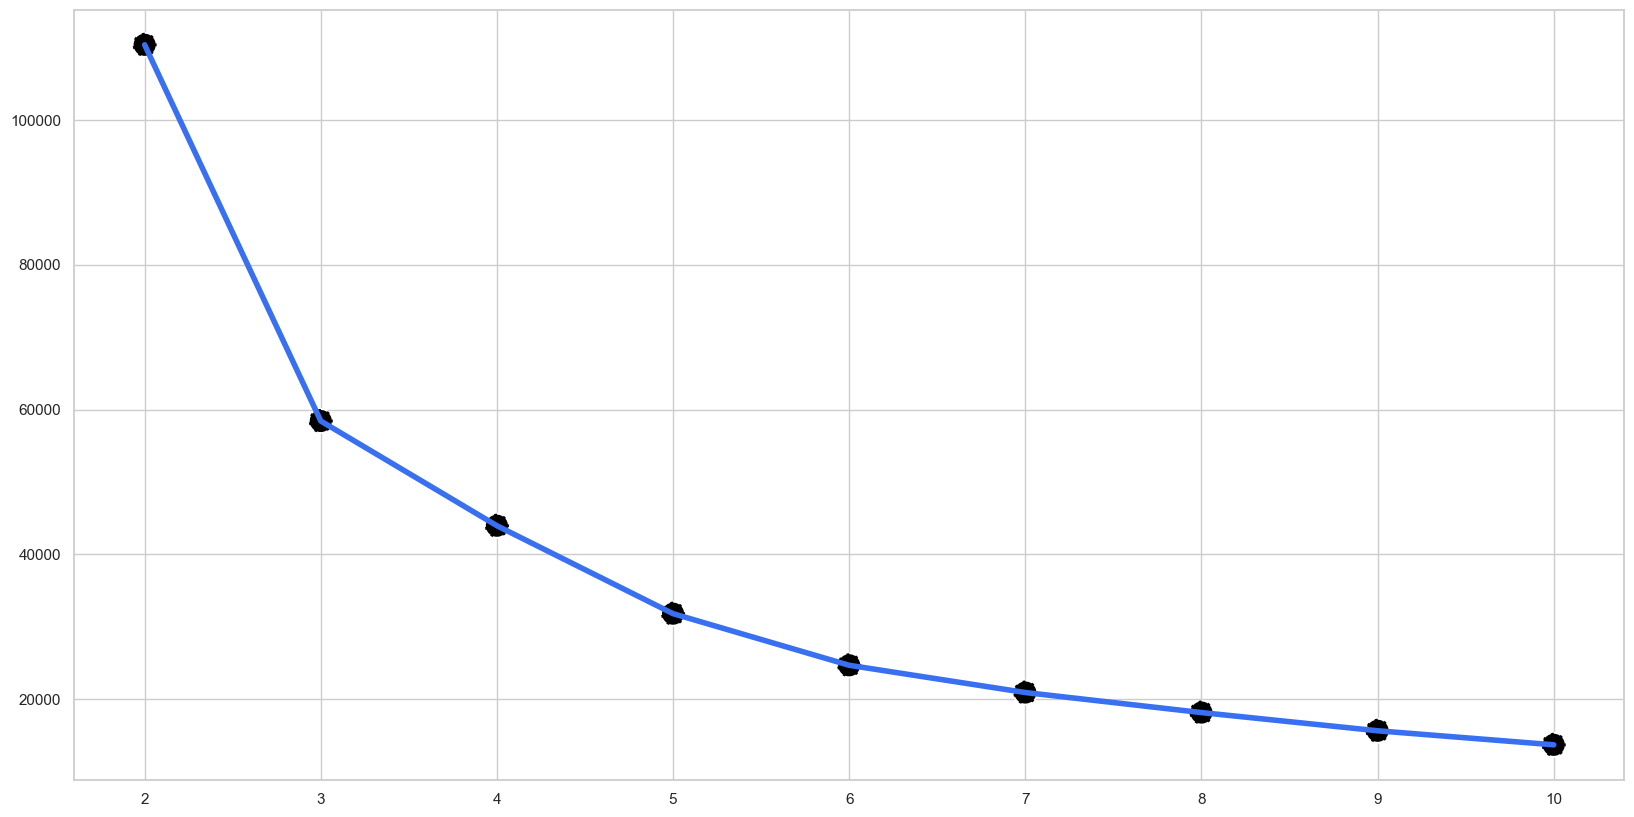

In [47]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#3970F1', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='black',  linestyle='--')

In [48]:
data_clean.to_csv("main_data.csv", index=False)